In [2]:
!pip install xgboost dtreeviz


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay



In [4]:

# Import the necessary libraries
import pandas as pd

data_df = pd.read_csv ("/Users/ronakshakari/Desktop/Assignment1/spam.csv")

data_df.head()


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [5]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [6]:
data_df.describe() 

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
import numpy as np
data_df=data_df.replace(np.nan,'hello how are you')


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_df['email'])
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X=X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, data_df['label'], test_size=0.3, random_state=55)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [10]:
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.92

In [11]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.8822222222222222

In [12]:
# re-checking the presence of null value in column 'email'
data_df['email'].isnull().sum()

0

In [13]:
# filling the null value using fillna() method
data_df['email'].fillna(method = 'ffill', inplace = True)
data_df['email'].isnull().sum()

0

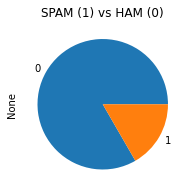

In [14]:
plt.figure(figsize=(3,3))
spam_ham = data_df.value_counts(data_df['label'],sort = True)
spam_ham.plot(kind = 'pie')
plt.title('SPAM (1) vs HAM (0)')
plt.show()

In [15]:
X = data_df.email
y = data_df.label

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
# CountVectorizer() randomly assigns number to each words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [19]:
y_pred = model.predict(X_test)

In [20]:
# ACCURACY
print(model.score(X_test, y_test))

0.95


In [21]:
# Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       506
           1       1.00      0.68      0.81        94

    accuracy                           0.95       600
   macro avg       0.97      0.84      0.89       600
weighted avg       0.95      0.95      0.95       600



[[506   0]
 [ 30  64]]


<AxesSubplot:title={'center':'Confusion Matrix Visualization'}>

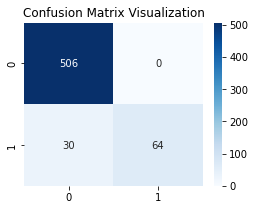

In [22]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix Visualization')
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

In [23]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

/Users/ronakshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=33, solver='sag')